# Edge Detection

Pada tugas ini, akan dibandingkan tiga metode yang biasa digunakan untuk deteksi tepi yakni
- Sobel Egde Detection
- Canny Edge Detection
- Hildreth-Marr (Laplacian of Gaussian)

NOTE!!

Kalau ingin menjalankan notebook ini di AWS Sagemaker Studio Lab, perlu menginstall package opencv yang versi headless dengan menjalankan perintah berikut


In [8]:
!pip install opencv-python-headless

     |████████████████████████████████| 48.3 MB 4.0 MB/s eta 0:00:01


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Data Gambar

Proses deteksi tepi akan coba dilakukan pada gambar berikut
- Koin
<br/>
<img src="coin.jpg" style="width: 90px;"/>
<br/>
- Daun
<br/>
<img src="Daun.jpg" style="width: 90px;"/>
<br/>
- MRI Otak
<br/>
<img src="Picture1.jpg" style="width: 90px;"/>
<br/>

Semua gambar akan dimuat dalam warna grayscale


In [34]:
coin_img = cv2.imread('./coin.jpg',0)
leaf_img = cv2.imread('./leaf.jpg',0)
brain_img = cv2.imread('./brain.jpg',0)

Berikut merupakan tampilan dari gambar tersebut

(-0.5, 318.5, 359.5, -0.5)

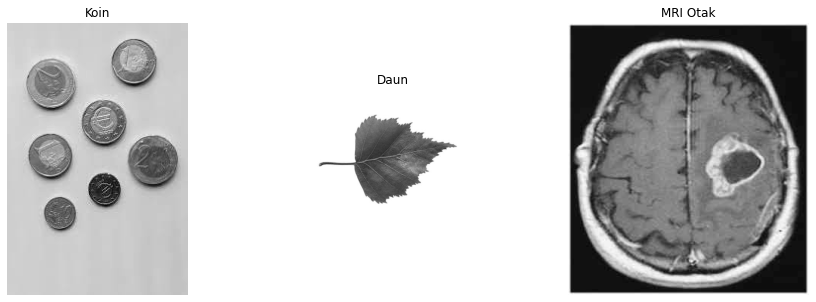

In [36]:
fig, (im1, im2, im3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
im1.imshow(coin_img, cmap='gray')
im1.set_title("Koin")
im1.axis('off')
im2.imshow(leaf_img, cmap='gray')
im2.set_title("Daun")
im2.axis('off')
im3.imshow(brain_img, cmap='gray')
im3.set_title("MRI Otak")
im3.axis('off')

## Sobel Edge Detector


In [37]:
def sobel_detector(img):
    sobel_x = cv2.Sobel(img.copy(), cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    sobel_y = cv2.Sobel(img.copy(), cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    abs_x = cv2.convertScaleAbs(sobel_x)
    abs_y = cv2.convertScaleAbs(sobel_y)
    img_add = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 0)
    return img_add 


In [38]:
coin_sobel = sobel_detector(coin_img)
leaf_sobel = sobel_detector(leaf_img)
brain_sobel = sobel_detector(brain_img)

(-0.5, 318.5, 359.5, -0.5)

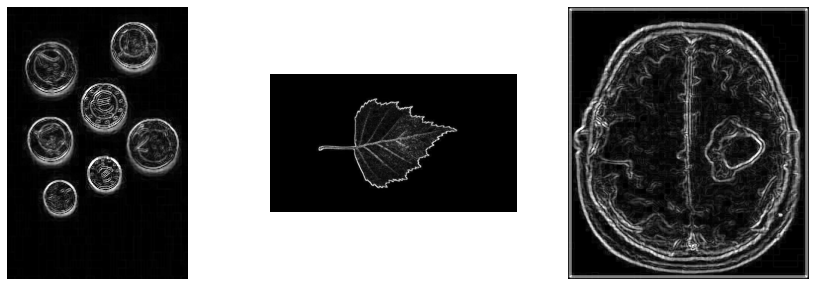

In [39]:
fig, (im1, im2, im3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
im1.imshow(coin_sobel, cmap='gray')
im1.axis('off')
im2.imshow(leaf_sobel, cmap='gray')
im2.axis('off')
im3.imshow(brain_sobel, cmap='gray')
im3.axis('off')


## Marr-Hilldreth Edge Detector (Laplacian of Gaussian)

In [40]:
def laplacian_of_gaussian(img):
    img_laplace_blur = cv2.GaussianBlur(img.copy(), (3,3), 0)
    img_laplace = cv2.Laplacian(img_laplace_blur, cv2.CV_16S, ksize=3)
    img_laplace_abs = cv2.convertScaleAbs(img_laplace)
    return img_laplace_abs


In [41]:
coin_log = laplacian_of_gaussian(coin_img)
leaf_log = laplacian_of_gaussian(leaf_img)
brain_log = laplacian_of_gaussian(brain_img)

(-0.5, 318.5, 359.5, -0.5)

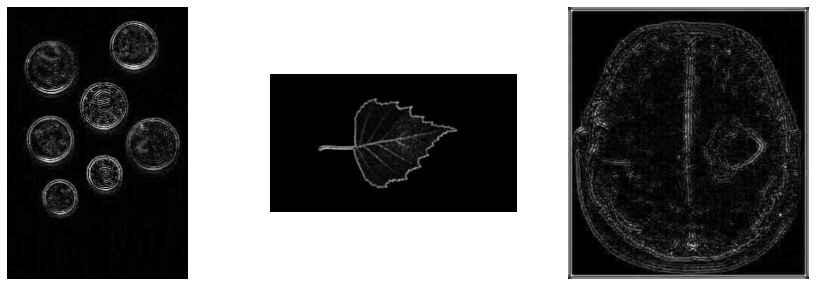

In [42]:
fig, (im1, im2, im3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
im1.imshow(coin_log, cmap='gray')
im1.axis('off')
im2.imshow(leaf_log, cmap='gray')
im2.axis('off')
im3.imshow(brain_log, cmap='gray')
im3.axis('off')

## Canny Edge Detection

(-0.5, 182.5, 274.5, -0.5)

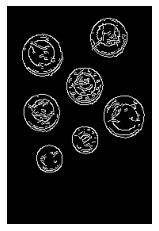

In [43]:
coin_canny = cv2.Canny(coin_img.copy(), 100, 200, 3)
plt.imshow(coin_canny, cmap='gray')
plt.axis('off')

In [38]:
help(cv2.GaussianBlur)

Help on built-in function GaussianBlur:

GaussianBlur(...)
    GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
    .   @brief Blurs an image using a Gaussian filter.
    .   
    .   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
    .   supported.
    .   
    .   @param src input image; the image can have any number of channels, which are processed
    .   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
    .   positive and odd. Or, they can be zero's and then they are computed from sigma.
    .   @param sigmaX Gaussian kernel standard deviation in X direction.
    .   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
    .   equal to sigmaX, if both sigmas are z

In [44]:
def canny_detector(img, lower, upper, kernel_size, blur_kernel_size):
    img_blur = cv2.GaussianBlur(img.copy(), (blur_kernel_size, blur_kernel_size), 0)
    img_canny = cv2.Canny(img_blur, 100, 200, 3)
    return img_canny


(-0.5, 182.5, 274.5, -0.5)

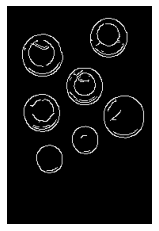

In [47]:
coin_canny = canny_detector(coin_img.copy(), 100, 200, 3, 3)
plt.imshow(coin_canny, cmap='gray')
plt.axis('off')

In [45]:
coin_canny = canny_detector(coin_img.copy(), 100, 200, 3, 3)
leaf_canny = canny_detector(leaf_img.copy(), 100, 200, 3, 3)
brain_canny = canny_detector(brain_img.copy(), 100, 200, 3, 3)

(-0.5, 318.5, 359.5, -0.5)

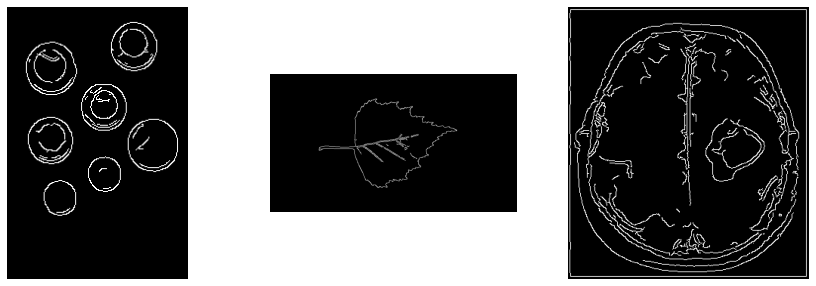

In [46]:
fig, (im1, im2, im3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
im1.imshow(coin_canny, cmap='gray')
im1.axis('off')
im2.imshow(leaf_canny, cmap='gray')
im2.axis('off')
im3.imshow(brain_canny, cmap='gray')
im3.axis('off')

## Perbandingan dari masing-masing Detektor Tepi

(-0.5, 318.5, 359.5, -0.5)

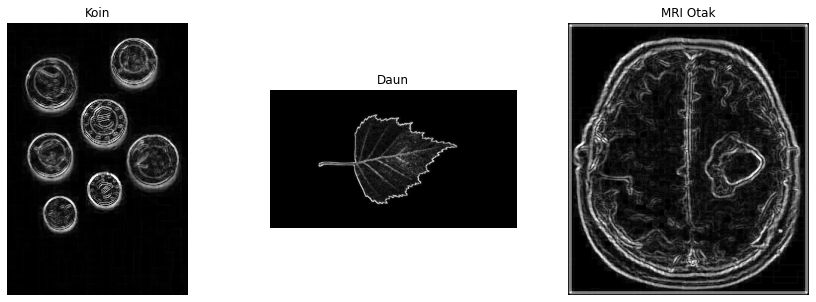

In [47]:
fig, (im1, im2, im3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
im1.imshow(coin_sobel, cmap='gray')
im1.set_title("Koin")
im1.axis('off')
im2.imshow(leaf_sobel, cmap='gray')
im2.set_title("Daun")
im2.axis('off')
im3.imshow(brain_sobel, cmap='gray')
im3.set_title("MRI Otak")
im3.axis('off')

(-0.5, 318.5, 359.5, -0.5)

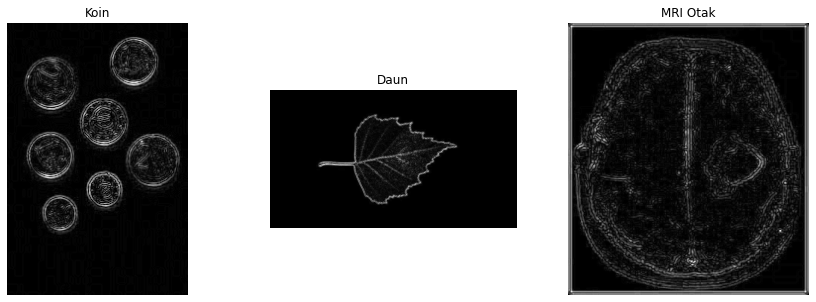

In [48]:
fig, (im1, im2, im3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
im1.imshow(coin_log, cmap='gray')
im1.set_title("Koin")
im1.axis('off')
im2.imshow(leaf_log, cmap='gray')
im2.set_title("Daun")
im2.axis('off')
im3.imshow(brain_log, cmap='gray')
im3.set_title("MRI Otak")
im3.axis('off')

(-0.5, 318.5, 359.5, -0.5)

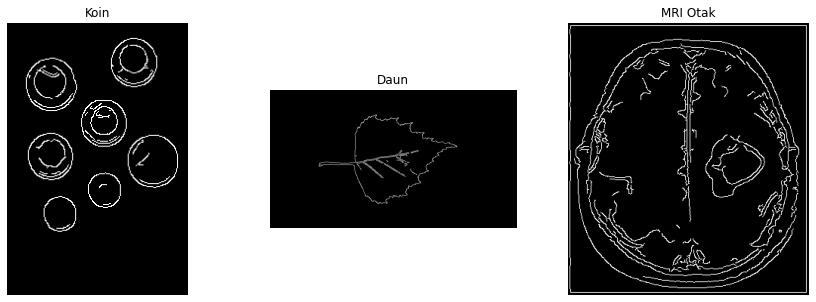

In [49]:
fig, (im1, im2, im3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
im1.imshow(coin_canny, cmap='gray')
im1.set_title("Koin")
im1.axis('off')
im2.imshow(leaf_canny, cmap='gray')
im2.set_title("Daun")
im2.axis('off')
im3.imshow(brain_canny, cmap='gray')
im3.set_title("MRI Otak")
im3.axis('off')

## Implementasi versi "nggak terlalu from scratch"
    
Pada bagian implementasi fungsi deteksi tepi ini, digunakan library scipy untuk membantu perhitungan konvolusi antara kernel dan gambar

In [111]:
import scipy.signal as sig

def sobel_scratch(img):
    x_kernel = [
        [-1,0,1],
        [-2,0,2],
        [-1,0,1]
    ]
    y_kernel = [
        [-1,-2,-1],
        [0,0,0],
        [1,2,1]
    ]

    x_conv = sig.convolve2d(img.copy(), x_kernel, mode='same')
    y_conv = sig.convolve2d(img.copy(), y_kernel, mode='same')

    img_g = np.sqrt(np.square(x_conv)+np.square(y_conv))
    #img_g_scaled = np.floor(img_g*255/np.max(img_g))
    img_g_scaled = np.floor(np.abs(img_g)*255/np.max(img_g))


    return np.array(img_g_scaled, dtype=np.uint8)



In [112]:
img_scratch = sobel_scratch(leaf_img)

(-0.5, 846.5, 189.5, -0.5)

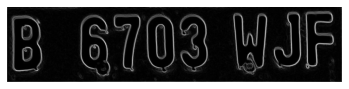

In [114]:
plt.imshow(img_scratch, cmap='gray')
plt.axis('off')